# **Data Quality with Python for Beginner**
**Modul DQLab** membahas konsep dasar dalam data quality menggunakan Python, mencakup data profiling sampai data cleansing yang merupakan bagian penting dari proses pre-analysis.

1.   Data Profiling
2.   Data Cleansing
3.   Mini Project

## **Data Profiling**
EDA atau Exploratory Data Analysis menggunakan pendekatan statistik yang bertujuan untuk menemukan dan meringkas sebuah dataset, mengetahui struktur dan hubungan antar variabel dalam dataset. EDA merupakan proses pre-analysis baik untuk descriptive analysis maupun predictive analysis.

Salah satu aspek EDA yaitu Data Profiling!

Data profiling adalah kegiatan merangkum dataset menggunakan statistik deskriptif. Tujuan dari pembuatan data profiling adalah untuk memiliki pemahaman yang kuat tentang data sehingga dapat mulai menyusun framework analisis dan memvisualisasikan data.
Data profiling salah satu aspek EDA.

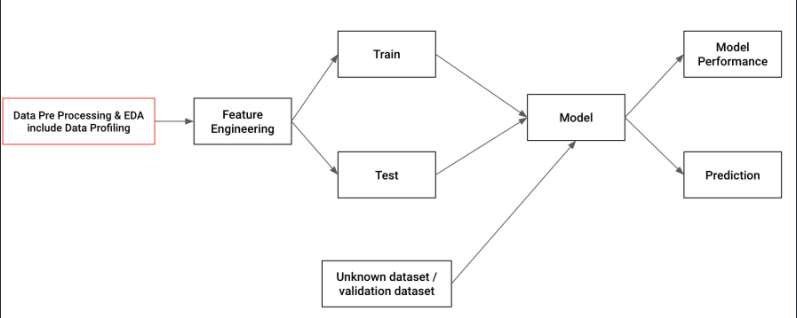

### **Importing Data**


In [ ]:
import pandas as pd
import numpy as np
import io
import pandas_profiling
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

In [ ]:
retail_raw

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,17/10/2019,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0
1,1706815,24/10/2019,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0
2,1710718,03/11/2019,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0
3,1683592,19/08/2019,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0
4,1702573,16/10/2019,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN
...,...,...,...,...,...,...,...,...,...
4995,1724011,01/12/2019,12838,Tangerang,Banten,P3047,BRAND_R,2.0,450000.0
4996,1676302,28/07/2019,13833,Bogor,Jawa Barat,P0760,BRAND_C,3.0,1465000.0
4997,1706071,23/10/2019,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4.0,747000.0
4998,1703620,17/10/2019,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8.0,695000.0


### **Inspeksi Tipe Data**

Dengan library Pandas, dapat menjalankan fungsi **.dtypes** untuk melihat tipe data setiap kolom.

In [ ]:
# Cetak tipe data di setiap kolom retail_raw
print(retail_raw.dtypes)

order_id         int64
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object


### **Descriptive Statistics - Part 1**

Berbagai statistik deskriptif dapat digunakan untuk lebih memahami struktur data.

**Length**

Fungsi len menghitung jumlah pengamatan dalam suatu series/column. Fungsi len akan menghitung semua pengamatan, terlepas dari apakah ada null-value atau tidak (include missing value).

In [ ]:
# Kolom city
length_city = len(retail_raw['city'])
print('Length kolom city:', length_city)

Length kolom city: 5000


In [ ]:
# Tugas Praktek: Kolom product_id
length_product_id = len(retail_raw['product_id'])
print('Length kolom product_id:', length_product_id)

Length kolom product_id: 5000


### **Descriptive Statistics - Part 2**

**Count**

Fungsi count menghitung jumlah pengamatan non-NA/non-null dalam suatu series/column.

In [ ]:
# Count kolom city
count_city = retail_raw['city'].count()
print('Count kolom count_city:', count_city)

Count kolom count_city: 4984


In [ ]:
# Tugas praktek: count kolom product_id
count_product_id = retail_raw['product_id'].count()
print('Count kolom product_id:', count_product_id)

Count kolom product_id: 4989


### **Descriptive Statistics - Part 3**

In [ ]:
# Kolom city
length_city = len(retail_raw['city'])
count_city = retail_raw['city'].count()
# Kolom product id
length_product_id = len(retail_raw['product_id'])
count_product_id = retail_raw['product_id'].count()

**Missing Value**

Dengan Length dan Count, sekarang dapat menghitung jumlah missing-value. 

Jumlah nilai yang hilang adalah perbedaan antara Length dan Count.

In [ ]:
# Missing value pada kolom city
number_of_missing_values_city = length_city - count_city
float_of_missing_values_city = float(number_of_missing_values_city/length_city)
pct_of_missing_values_city = '{0:.1f}%'.format(float_of_missing_values_city * 100)
print('Persentase missing value kolom city:', pct_of_missing_values_city)

Persentase missing value kolom city: 0.3%


In [ ]:
# Tugas praktek: Missing value pada kolom product_id
number_of_missing_values_product_id = length_product_id - count_product_id
float_of_missing_values_product_id = float(number_of_missing_values_product_id/length_product_id)
pct_of_missing_values_product_id = '{0:.1f}%'.format(float_of_missing_values_product_id * 100)
print('Persentase missing value kolom product_id:', pct_of_missing_values_product_id)

Persentase missing value kolom product_id: 0.2%


### **Descriptive Statistics - Part 4**

**Maximum dan Minimum**

Fungsi **max** dan **min** digunakan untuk mengetahui elemen terbesar dan terkecil dari suatu kolom di dataframe.

**Mean, Median, Modus, dan Standar Deviasi**

Fungsi **mean**, **median**, **modus**, dan **standar deviasi** digunakan untuk mengetahui pemusatan data dan persebarannya.

In [ ]:
# Deskriptif statistics kolom quantity
print('Kolom quantity')
print('Minimum value: ', retail_raw['quantity'].min())
print('Maximum value: ', retail_raw['quantity'].max())
print('Mean value: ', retail_raw['quantity'].mean())
print('Mode value: ', retail_raw['quantity'].mode())
print('Median value: ', retail_raw['quantity'].median())
print('Standard Deviation value: ', retail_raw['quantity'].std())

Kolom quantity
Minimum value:  1.0
Maximum value:  720.0
Mean value:  11.423987164059366
Mode value:  0    1.0
dtype: float64
Median value:  5.0
Standard Deviation value:  29.44202501081146


In [ ]:
# Tugas praktek: Deskriptif statistics kolom item_price
print('')
print('Kolom item_price')
print('Minimum value: ', retail_raw['item_price'].min())
print('Maximum value: ', retail_raw['item_price'].max())
print('Mean value: ', retail_raw['item_price'].mean())
print('Median value: ', retail_raw['item_price'].median())
print('Standard Deviation value: ', retail_raw['item_price'].std())


Kolom item_price
Minimum value:  26000.0
Maximum value:  29762000.0
Mean value:  933742.7311008623
Median value:  604000.0
Standard Deviation value:  1030829.8104242847


### **Descriptive Statistics - Part 5**

**Quantile Statistics**

Quantiles adalah titik potong yang membagi distribusi dalam ukuran yang sama. Jika akan membagi distribusi menjadi empat grup yang sama, kuantil yang dibuat dinamai quartile. Jika dibagi ke dalam sepuluh grup yang sama dinamakan percentile.

Dalam kasus di bawah ini, ingin membagi distribusi menjadi empat grup atau quartile.

In [ ]:
# Quantile statistics kolom quantity
print('Kolom quantity:')
print(retail_raw['quantity'].quantile([0.25, 0.5, 0.75]))

Kolom quantity:
0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64


In [ ]:
# Tugas praktek: Quantile statistics kolom item_price
print('')
print('Kolom item_price:')
print(retail_raw['item_price'].quantile([0.25, 0.5, 0.75]))


Kolom item_price:
0.25     450000.0
0.50     604000.0
0.75    1045000.0
Name: item_price, dtype: float64


### **Descriptive Statistics - Part 6**

**Correlation**

Korelasi adalah cara yang tepat untuk menemukan hubungan antara variabel numerik. Koefisien korelasi berkisar antara -1 hingga 1. Korelasi 1 adalah korelasi positif total, korelasi -1 adalah korelasi negatif total, dan korelasi 0 adalah korelasi non-linear.

In [ ]:
print('Korelasi quantity dengan item_price')
print(retail_raw[['quantity', 'item_price']].corr())

Korelasi quantity dengan item_price
            quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


### **Penggunaan Profiling Libraries**

Seperti yang terlihat di atas, mengumpulkan statistik deskriptif dapat menjadi proses yang panjang. Pandas Profiling library memiliki function yang dapat membuat profiling data secara otomatis. Untuk dapat menggunakannya, cukup dengan memanggil library: 

***import pandas_profiling***

dengan sintaks:

***pandas_profiling.ProfileReport('nama_dataframe')***

## **Data Cleansing**
Data Cleansing berarti proses mengidentifikasi bagian data yang salah, tidak lengkap, tidak akurat, tidak relevan atau hilang dan kemudian memodifikasi, mengganti, atau menghapusnya sesuai dengan kebutuhan. Data Cleansing dianggap sebagai elemen dasar dari Data Science.

Data Cleansing dapat berupa treatment terhadap missing data, outliers, sampai deduplikasi data.

### **Missing Data**

Dataset yang ditemui di real-world biasanya akan memiliki banyak missing value. Kemampuan untuk treatment missing value sangat penting karena jika membiarkannya dapat memengaruhi analisis dan machine learning model. 

Cara check kolom yang mempunyai missing value:

***nama_dataframe.isnull().any()***

Cara treatment terhadap missing value antara lain:
1. Leave as it is (dibiarkan)
2. Filling the missing value (imputasi)
3. Drop them (hapus row yang mengandung missing value) 

In [ ]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool


**Imputasi** merupakan suatu metode treatment terhadap missing value dengan mengisinya menggunakan teknik tertentu. Bisa menggunakan fungsi mean dan modus, ataupun menggunakan predictive modelling. 

Pemanfaatan function fillna dari Pandas untuk imputasi ini, yaitu:

***nama_dataframe['nama_kolom'].fillna(nama_datframe.nama_kolom.function())***


Penggunaan function **.mean()** atau **.mode()** bergantung pada kondisi yang mengharuskan menggunakan nilai rata-rata atau modus dari kolom yang akan diimputasi.

In [ ]:
# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw.quantity.mean()))


Filling the missing value (imputasi):
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64


**Drop** row yang mengandung missing value dapat menggunakan function dropna dari Pandas.

***nama_dataframe['nama_kolom'].dropna()***


In [ ]:
# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())


Drop missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


**Tugas Praktek**

In [ ]:
print(retail_raw['item_price'].fillna(retail_raw['item_price'].mean()))

0       7.400000e+05
1       6.040000e+05
2       1.045000e+06
3       2.050000e+05
4       9.337427e+05
            ...     
4995    4.500000e+05
4996    1.465000e+06
4997    7.470000e+05
4998    6.950000e+05
4999    1.045000e+06
Name: item_price, Length: 5000, dtype: float64


### **Outliers**

Outliers merupakan data observasi yang muncul dengan nilai-nilai ekstrim. Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya.

Cara treatment terhadap outliers antara lain:
1. Remove the outliers (dibuang)
2. Filling the missing value (imputasi)
3. Capping
4. Prediction

Pada umumnya, outliers dapat ditentukan dengan metric IQR (interquartile range).

Rumus dasar dari IQR = Q3 - Q1

Data suatu observasi dapat dikatakan outliers jika memenuhi syarat: < Q1 - 1.5 * IQR atau > Q3 - 1.5 * IQR

In [ ]:
# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

Shape awal:  (5000, 9)


In [ ]:
# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1 - 1.5 * IQR)) | (retail_raw['quantity'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape akhir:  (4699, 9)


**Tugas Praktek**

In [ ]:
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

# Q1, Q3, dan IQR
Q1 = retail_raw['item_price'].quantile(0.25)
Q3 = retail_raw['item_price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

Shape awal:  (5000, 9)


In [ ]:
# Removing outliers
retail_raw = retail_raw[~((retail_raw['item_price'] < (Q1 - 1.5*IQR)) | (retail_raw['item_price'] > (Q3 + 1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape akhir:  (4541, 9)


### **Deduplikasi Data**

Duplikasi data merupakan data dengan kondisi pada row-row tertentu memiliki kesamaan data di seluruh kolomnya. Kondisi duplikasi harus diatasi dengan jalan mengeliminir baris yang mengalami duplikasi, sehingga proses ini dikenal dengan deduplikasi.

Untuk mengecek duplikasi data:

***nama_dataframe.duplicated(subset=None)***

Untuk membuang duplikasi: 

***nama_dataframe.drop_duplicates()***


**Tugas Praktek**

In [ ]:
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

Shape awal:  (5000, 9)


In [ ]:
# Buang data yang terduplikasi
retail_raw.drop_duplicates(inplace=True)

In [ ]:
# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)

Shape akhir:  (4993, 9)


## **Mini Project**

### **Case Studi: Data Profiling**

Dataset terlampir yang disimpan dalam bentuk csv bernama 'https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv'

Dataset dapat diproses dengan cara berikut:
1. Import dataset csv ke variable bernama **uncleaned_raw**
2. Inspeksi dataframe uncleaned_raw
3. Check kolom yang mengandung missing value. Jika ada, kolom apakah itu dan berapa persen missing value pada kolom tersebut?
4. Mengisi missing value tersebut dengan mean dari kolom tersebut!


In [1]:
import pandas as pd
import numpy as np
import io
import pandas_profiling

In [ ]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

In [ ]:
uncleaned_raw

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,City
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 08.26,29000,17850,Surabaya
1,536366,WHITE METAL LANTERN,6.0,12/01/10 08.26,41000,17850,Surabaya
2,536367,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 08.26,18000,17850,Surabaya
3,536368,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 08.26,38000,17850,Jakarta
4,536369,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 08.26,27000,17850,Medan
...,...,...,...,...,...,...,...
500,536772,PACK OF 60 SPACEBOY CAKE CASES,24.0,12/01/10 11.29,41000,16218,Surabaya
501,536773,PACK OF 72 RETROSPOT CAKE CASES,24.0,12/01/10 11.29,35000,16218,Surabaya
502,536774,72 SWEETHEART FAIRY CAKE CASES,24.0,12/01/10 11.29,32000,16218,Medan
503,536775,PACK OF 60 DINOSAUR CAKE CASES,24.0,12/01/10 11.29,31000,16218,Surabaya


In [ ]:
#Inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw.head())

Lima data teratas:
   InvoiceNo                          Description  Quantity     InvoiceDate  \
0     536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1     536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2     536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4     536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   

   UnitPrice  CustomerID      City  
0      29000       17850  Surabaya  
1      41000       17850  Surabaya  
2      18000       17850  Surabaya  
3      38000       17850   Jakarta  
4      27000       17850     Medan  


In [ ]:
#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())


Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool


In [ ]:
#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty * 100) 

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

Persentase missing value kolom Quantity: 4.0%


In [ ]:
#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

**Case Study: Data Cleansing - Part 1**

Untuk memprosesnya bisa dilakukan dengan cara berikut:
5. Mengetahui kolom yang memiliki outliers! Gunakan visualisasi dengan boxplot pada dataframe uncleaned_raw.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

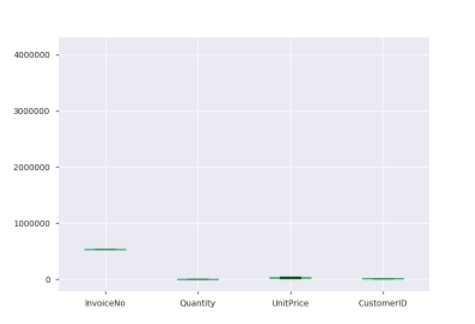

**Case Study: Data Cleansing - Part 2**

Langkah selanjutnya bisa dilakukan dengan cara berikut:
6. Melakukan proses removing outliers pada kolom UnitPrice
7. Checking duplikasi dan melakukan deduplikasi dataset tersebut!

In [ ]:
#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#Removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1-1.5*IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3+1.5*IQR)))]

In [ ]:
#Check for duplication
print(uncleaned_raw.duplicated(subset=None))

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool


In [ ]:
#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()